In [1]:
!pip install fbprophet
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 6.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for o

In [2]:
import numpy as np 
import pandas as pd 
from datetime import datetime

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

from colorama import Fore, Back, Style

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import plotly.express as px

In [3]:
data = pd.read_csv("/content/drive/Shareddrives/MSc in DS & AI/Semester 1/CS5617 - Data Science/Janani/Project/Dataset/coin_BinanceCoin.csv")

In [4]:
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0


In [5]:
px.area(data,
        x='Date',
        y='Close')

In [6]:
px.violin(data,
          y='Close')

In [7]:
data["CloseLog"] = np.log10(data["Close"])
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,CloseLog
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0,-0.978240
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0,-0.967635
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0,-0.982687
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0,-0.967337
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0,-0.973001


In [8]:
px.violin(data,
          y='CloseLog')

In [9]:
px.violin(data,
          y='Open')

In [10]:
data["OpenLog"] = np.log10(data["Open"])
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,CloseLog,OpenLog
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0,-0.978240,-0.975133
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0,-0.967635,-0.978364
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0,-0.982687,-0.968059
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0,-0.967337,-0.979713
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0,-0.973001,-0.966838


In [11]:
px.violin(data,
          y='High')

In [12]:
data["HighLog"] = np.log10(data["High"])
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,CloseLog,OpenLog,HighLog
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0,-0.978240,-0.975133,-0.962522
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0,-0.967635,-0.978364,-0.964654
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0,-0.982687,-0.968059,-0.962498
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0,-0.967337,-0.979713,-0.953645
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0,-0.973001,-0.966838,-0.966022


In [13]:
px.violin(data,
          y='Low')

In [14]:
data["LowLog"] = np.log10(data["Low"])
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,CloseLog,OpenLog,HighLog,LowLog
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0,-0.978240,-0.975133,-0.962522,-1.003202
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0,-0.967635,-0.978364,-0.964654,-0.996160
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0,-0.982687,-0.968059,-0.962498,-0.993649
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0,-0.967337,-0.979713,-0.953645,-0.995214
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0,-0.973001,-0.966838,-0.966022,-0.986480


In [15]:
px.violin(data,
          y='Volume')

In [16]:
data["VolumeLog"] = np.log10(data["Volume"])
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,CloseLog,OpenLog,HighLog,LowLog,VolumeLog
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0,-0.978240,-0.975133,-0.962522,-1.003202,5.301887
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0,-0.967635,-0.978364,-0.964654,-0.996160,5.537188
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0,-0.982687,-0.968059,-0.962498,-0.993649,5.534747
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0,-0.967337,-0.979713,-0.953645,-0.995214,5.531757
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0,-0.973001,-0.966838,-0.966022,-0.986480,5.350754


In [17]:
px.violin(data,
          y='Marketcap')

In [18]:
data["MarketCapLog"] = np.log10(data["Marketcap"])
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,CloseLog,OpenLog,HighLog,LowLog,VolumeLog,MarketCapLog
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0,-0.978240,-0.975133,-0.962522,-1.003202,5.301887,7.021760
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0,-0.967635,-0.978364,-0.964654,-0.996160,5.537188,7.032365
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0,-0.982687,-0.968059,-0.962498,-0.993649,5.534747,7.017313
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0,-0.967337,-0.979713,-0.953645,-0.995214,5.531757,7.032663
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0,-0.973001,-0.966838,-0.966022,-0.986480,5.350754,7.026999


In [19]:

y_= Fore.CYAN
m_= Fore.WHITE

print(f"{m_}Total records:{y_}{data.shape}\n")
print(f"{m_}Data types of data columns: \n{y_}{data.dtypes}")

Total records:(1442, 16)

Data types of data columns: 
SNo               int64
Name             object
Symbol           object
Date             object
High            float64
Low             float64
Open            float64
Close           float64
Volume          float64
Marketcap       float64
CloseLog        float64
OpenLog         float64
HighLog         float64
LowLog          float64
VolumeLog       float64
MarketCapLog    float64
dtype: object


In [20]:
data.drop(["Name", "Symbol"], axis = 1)

,SNo,Date,High,Low,Open,Close,Volume,Marketcap,CloseLog,OpenLog,HighLog,LowLog,VolumeLog,MarketCapLog
0,1,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07,-0.978240,-0.975133,-0.962522,-1.003202,5.301887,7.021760
1,2,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07,-0.967635,-0.978364,-0.964654,-0.996160,5.537188,7.032365
2,3,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07,-0.982687,-0.968059,-0.962498,-0.993649,5.534747,7.017313
3,4,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07,-0.967337,-0.979713,-0.953645,-0.995214,5.531757,7.032663
4,5,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07,-0.973001,-0.966838,-0.966022,-0.986480,5.350754,7.026999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,1438,2021-07-02 23:59:59,290.621683,277.350302,287.754456,287.423094,1.133633e+09,4.410016e+10,2.458522,2.459022,2.463328,2.443029,9.054472,10.644440
1438,1439,2021-07-03 23:59:59,302.605867,283.434010,287.215592,298.237117,1.113777e+09,4.575938e+10,2.474562,2.458208,2.480877,2.452452,9.046798,10.660480
1439,1440,2021-07-04 23:59:59,314.713019,292.787370,298.113557,307.732096,1.387396e+09,4.721623e+10,2.488173,2.474382,2.497915,2.466552,9.142200,10.674091
1440,1441,2021-07-05 23:59:59,307.684855,293.523465,307.684855,302.377980,1.504870e+09,4.639473e+10,2.480550,2.488106,2.488106,2.467643,9.177499,10.666469


In [21]:
data["Date"] = pd.to_datetime(data["Date"])

In [22]:
y_= Fore.CYAN
m_= Fore.WHITE

print(f"{m_}Total records:{y_}{data.shape}\n")
print(f"{m_}Data types of data columns: \n{y_}{data.dtypes}")

Total records:(1442, 16)

Data types of data columns: 
SNo                      int64
Name                    object
Symbol                  object
Date            datetime64[ns]
High                   float64
Low                    float64
Open                   float64
Close                  float64
Volume                 float64
Marketcap              float64
CloseLog               float64
OpenLog                float64
HighLog                float64
LowLog                 float64
VolumeLog              float64
MarketCapLog           float64
dtype: object


In [23]:
# data = data.set_index('Date')
# data.head()

In [24]:
missed = pd.DataFrame()
missed['column'] = data.columns

missed['percent'] = [round(100* data[col].isnull().sum() / len(data), 2) for col in data.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]

try:
  fig = sns.barplot(
      x=missed['percent'], 
      y=missed["column"], 
      orientation='horizontal',palette="winter"
  ).set_title('Missed values percent for every column')
except (ValueError):
  print("No missing values in any of the columns")

No missing values in any of the columns


In [25]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(25,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

<ipython-input-25-3232c148a27a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




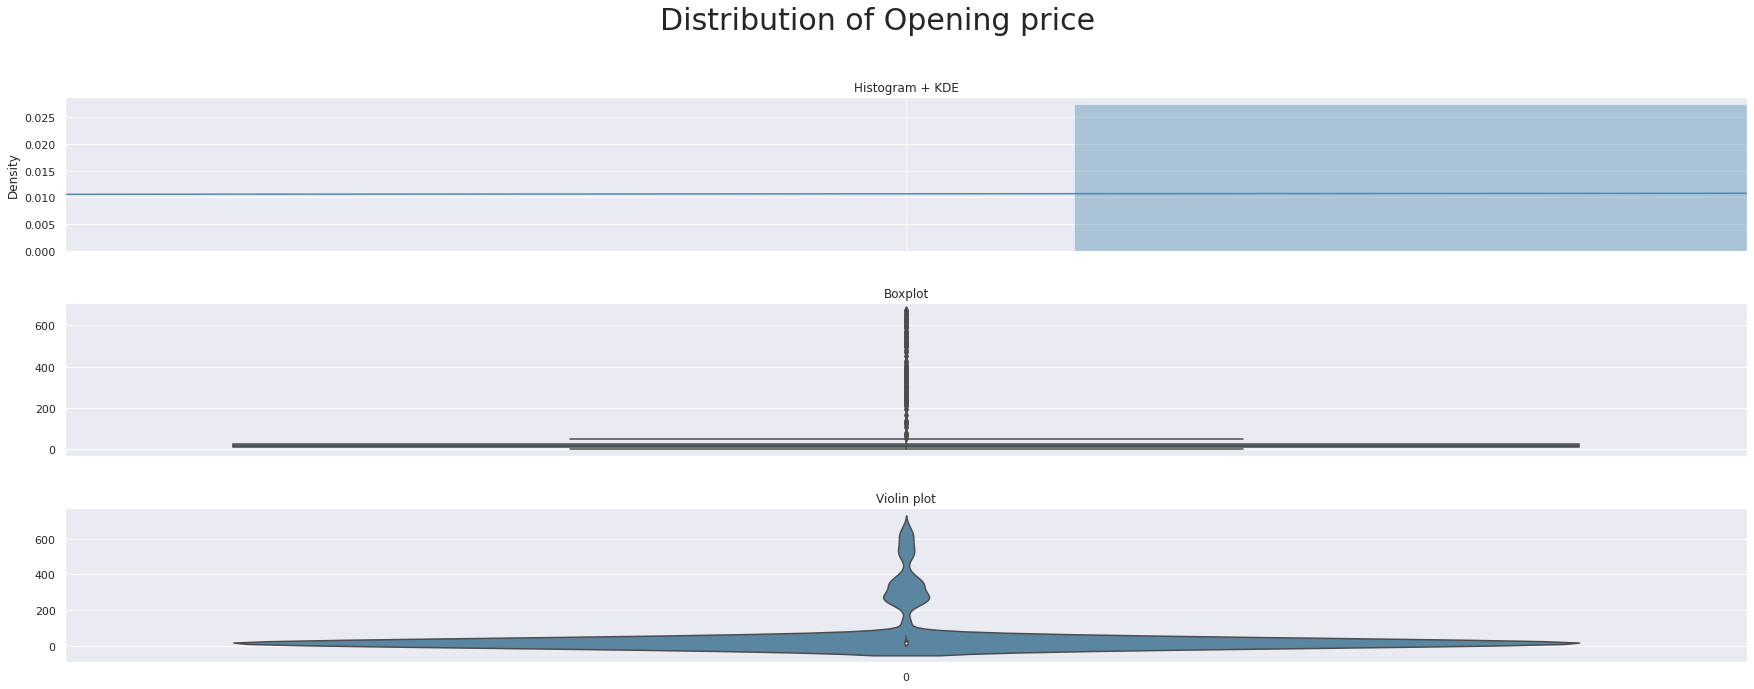

In [26]:
triple_plot(data['Open'],'Distribution of Opening price',custom_colors[0])

<ipython-input-25-3232c148a27a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




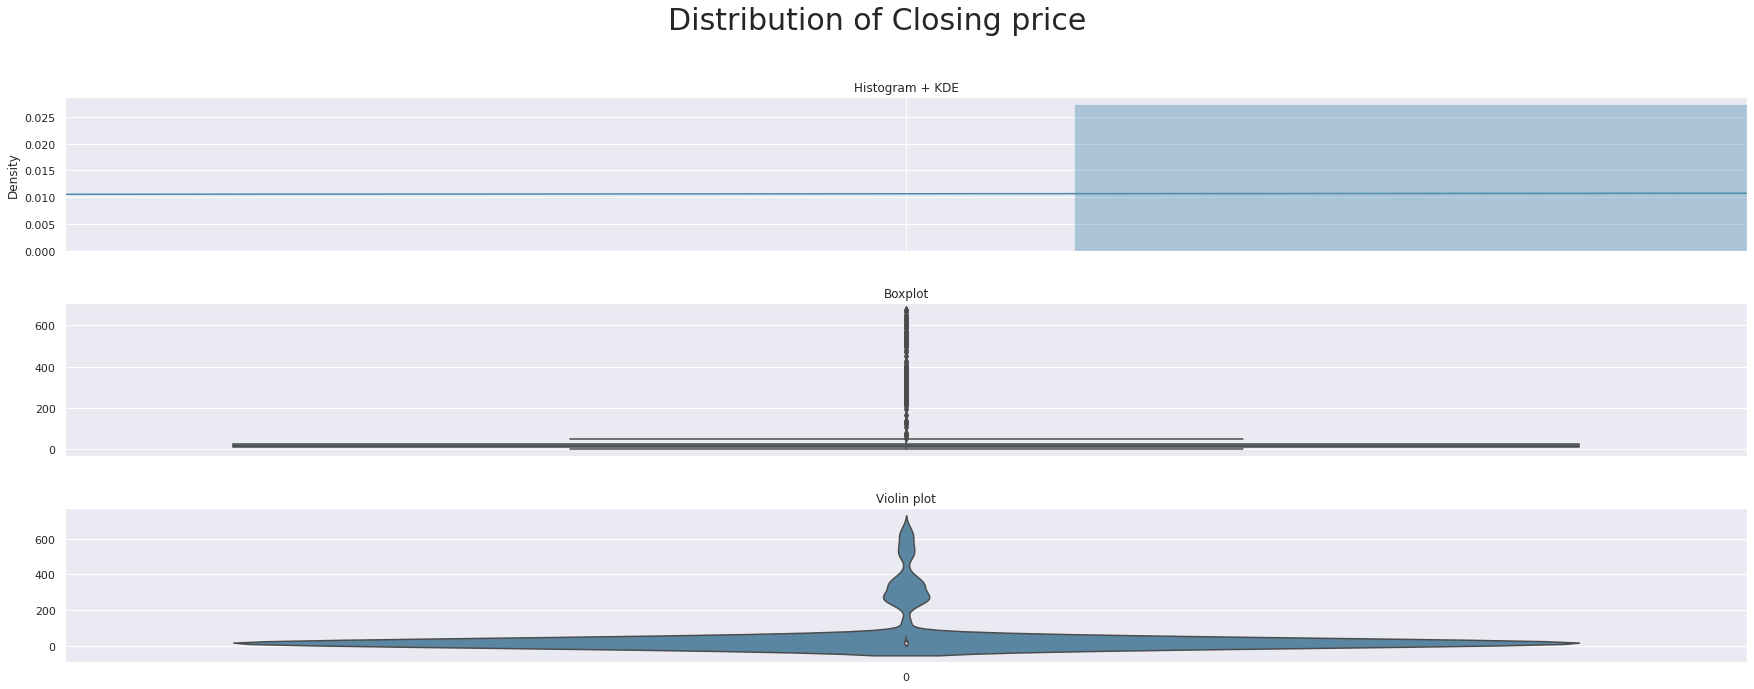

In [27]:
triple_plot(data['Close'],'Distribution of Closing price',custom_colors[0])

<ipython-input-25-3232c148a27a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




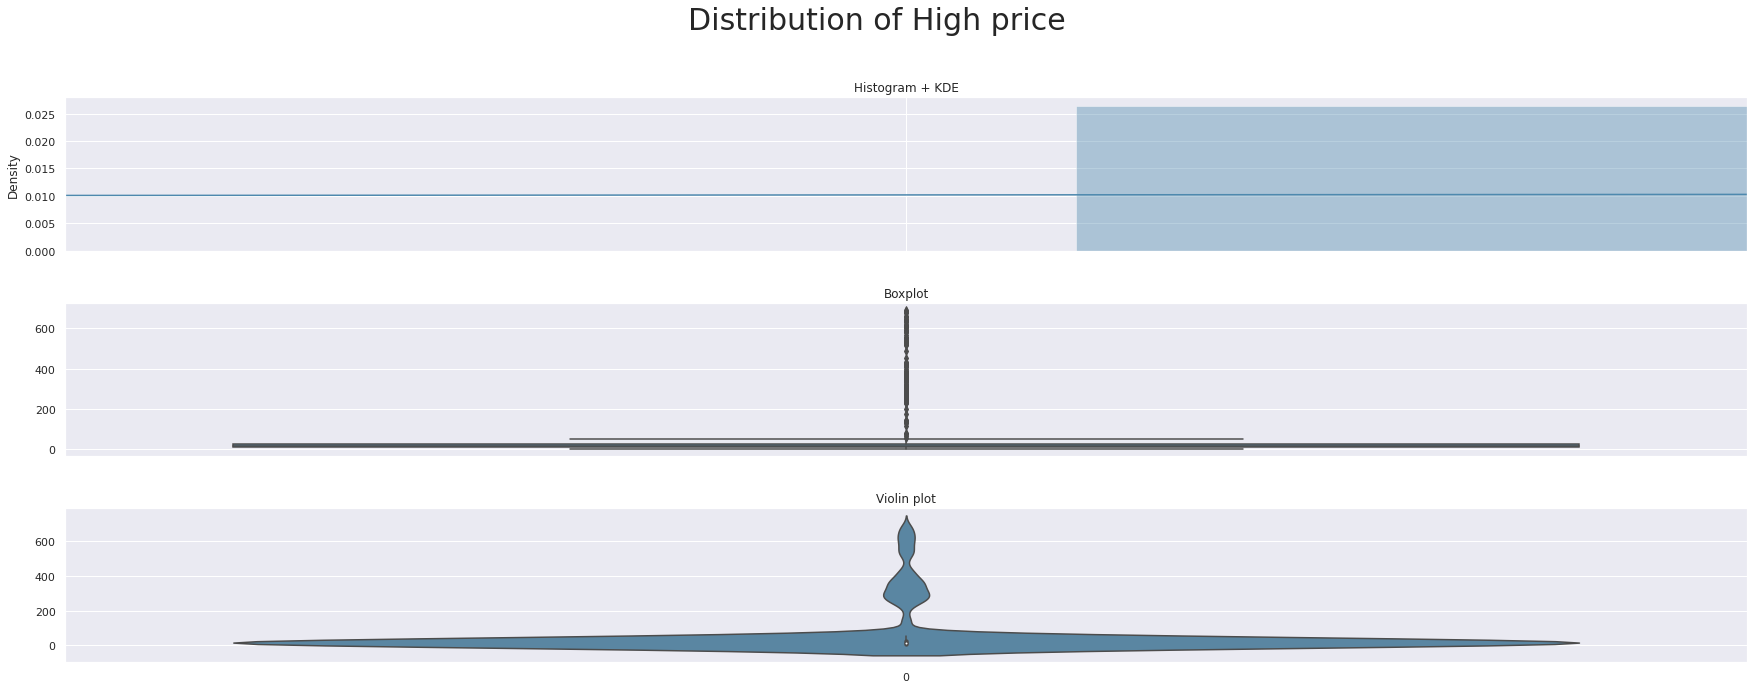

In [28]:
triple_plot(data['High'],'Distribution of High price',custom_colors[0])

<ipython-input-25-3232c148a27a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




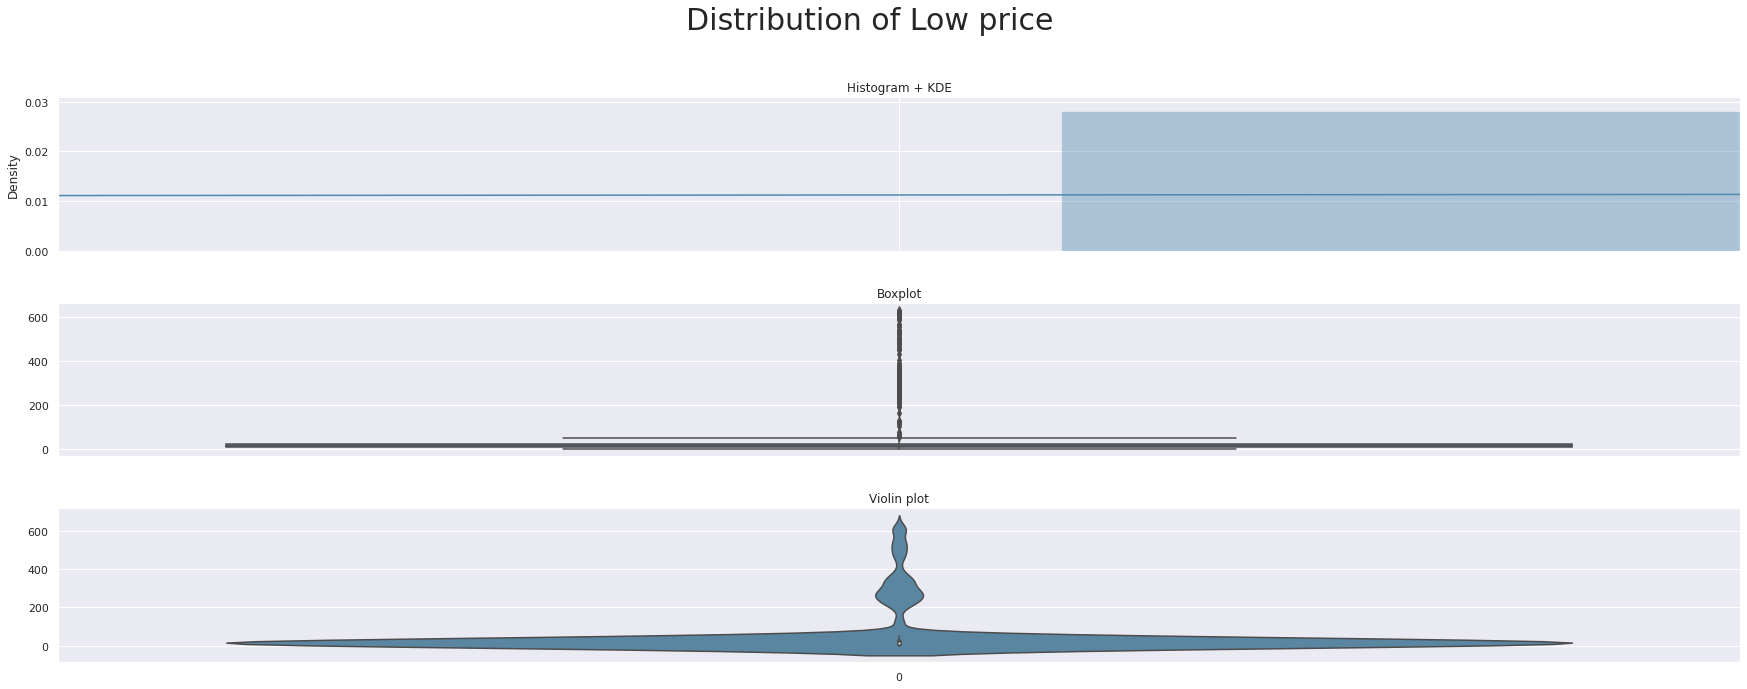

In [29]:
triple_plot(data['Low'],'Distribution of Low price',custom_colors[0])

<ipython-input-25-3232c148a27a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




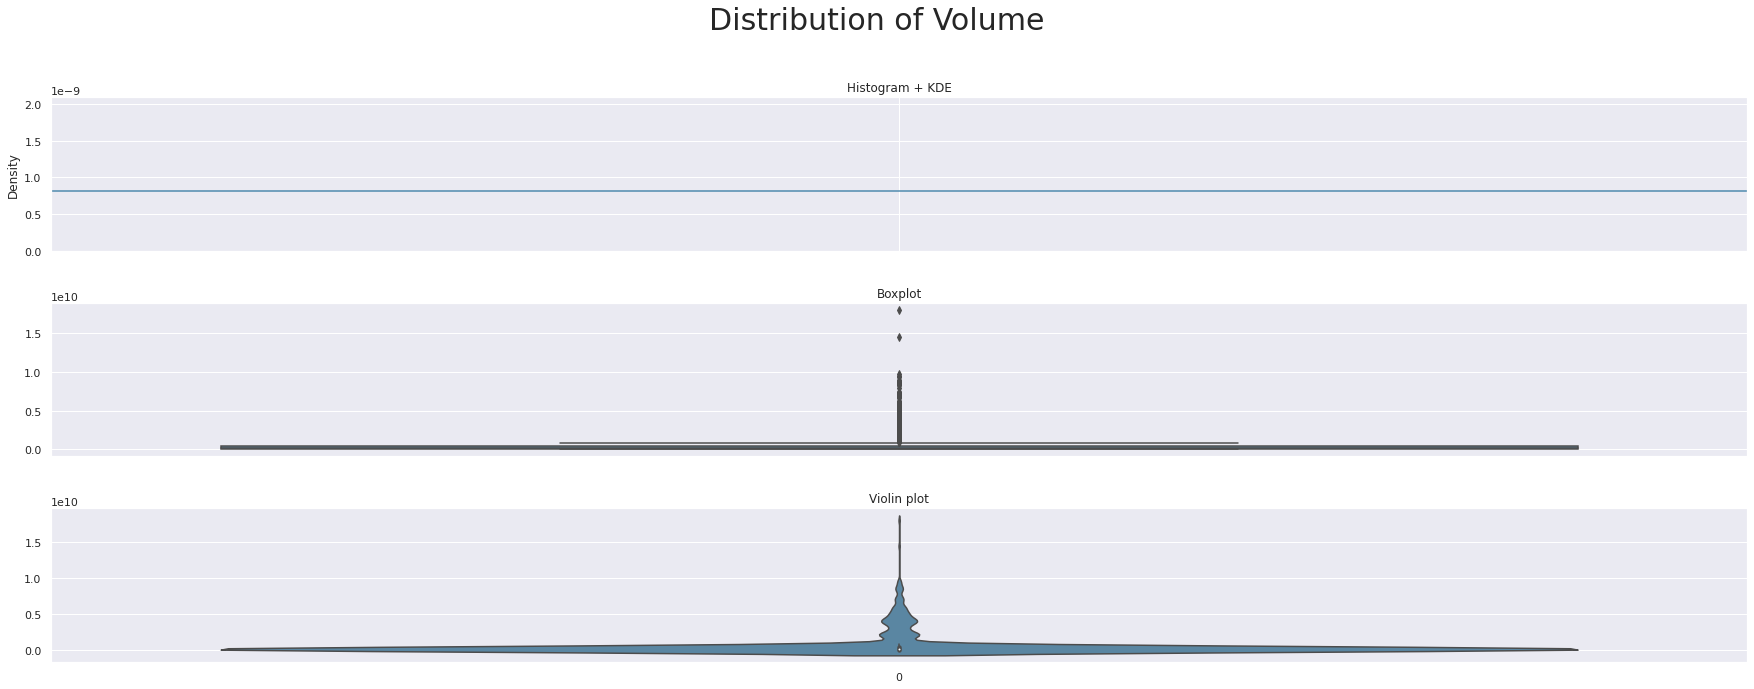

In [30]:
triple_plot(data['Volume'],'Distribution of Volume',custom_colors[0])

<ipython-input-25-3232c148a27a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




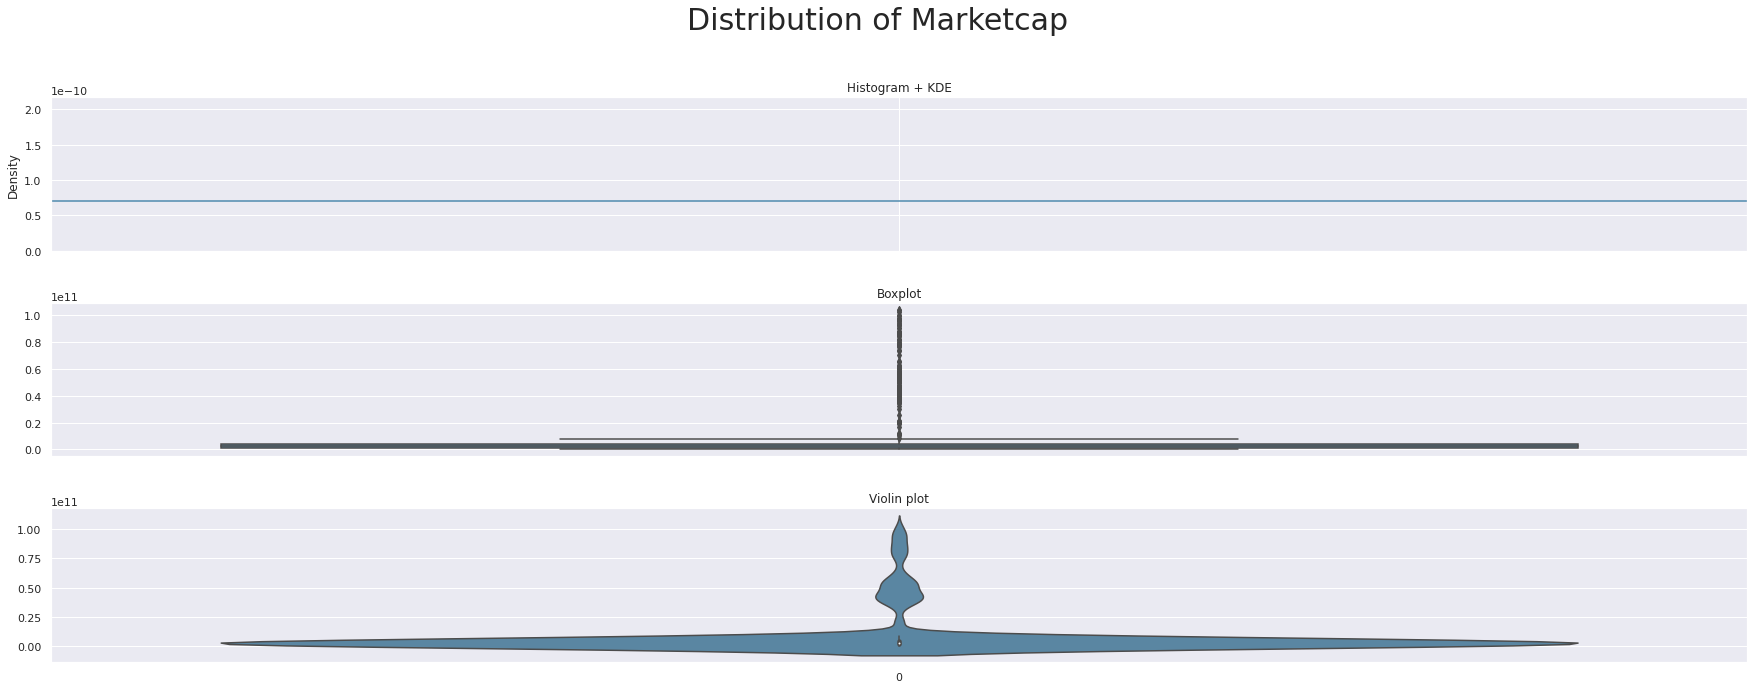

In [31]:
triple_plot(data['Marketcap'],'Distribution of Marketcap',custom_colors[0])

In [32]:
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,CloseLog,OpenLog,HighLog,LowLog,VolumeLog,MarketCapLog
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0,-0.978240,-0.975133,-0.962522,-1.003202,5.301887,7.021760
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0,-0.967635,-0.978364,-0.964654,-0.996160,5.537188,7.032365
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0,-0.982687,-0.968059,-0.962498,-0.993649,5.534747,7.017313
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0,-0.967337,-0.979713,-0.953645,-0.995214,5.531757,7.032663
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0,-0.973001,-0.966838,-0.966022,-0.986480,5.350754,7.026999


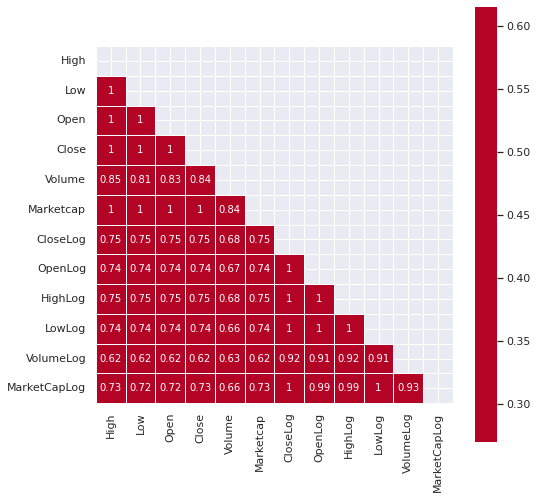

In [33]:
plt.figure(figsize=(8,8))
corr=data[data.columns[3:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data[data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

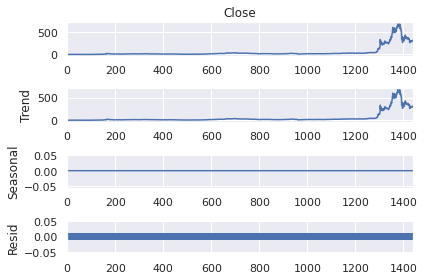

<Figure size 1080x864 with 0 Axes>

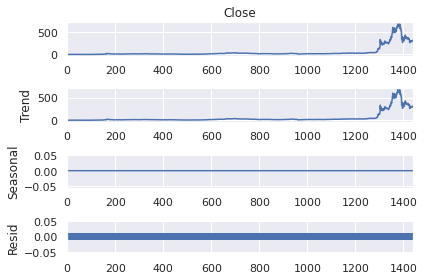

In [34]:
plt.figure(figsize=(15,12))
series = data.Close
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

In [35]:
# data.head()
# df = data["Date"]
prophet_df=data[["Date",'CloseLog']]
prophet_df.rename(columns={'Date':'ds','CloseLog':'y'},inplace=True)

<ipython-input-35-ca7550943ef6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
prophet_basic = Prophet()
prophet_basic.fit(prophet_df[['ds','y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
future= prophet_basic.make_future_dataframe(periods=365)#Making predictions for one year
future.tail(2)

,ds
1805,2022-07-05 23:59:59
1806,2022-07-06 23:59:59


In [38]:
forecast=prophet_basic.predict(future)

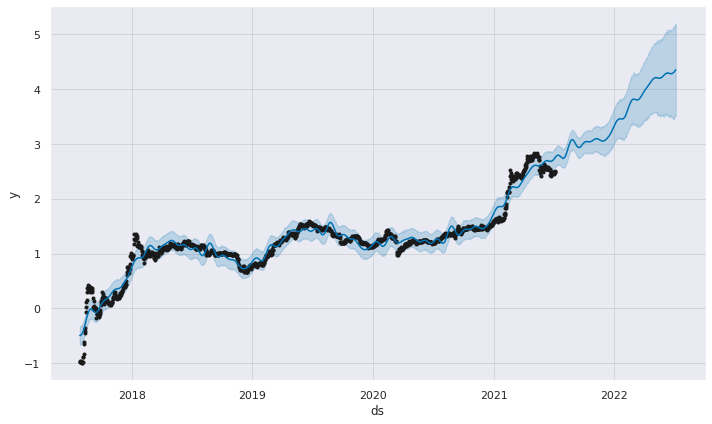

In [39]:
fig1 =prophet_basic.plot(forecast)

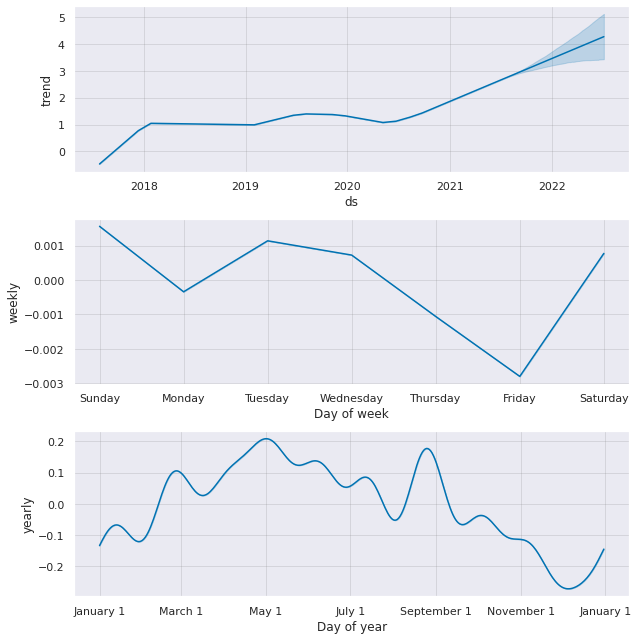

In [40]:
fig1 = prophet_basic.plot_components(forecast)

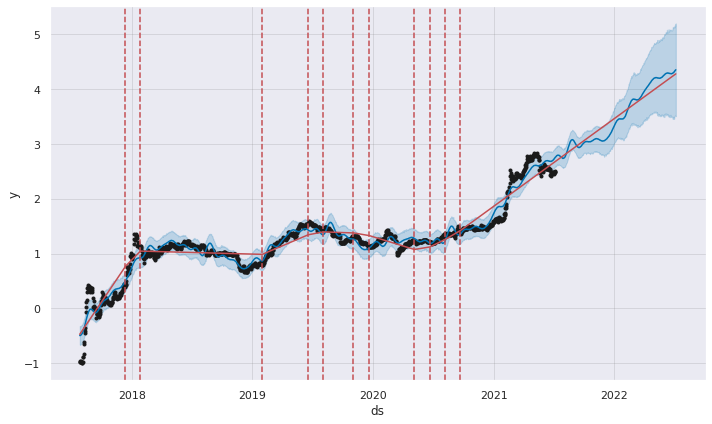

In [41]:
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

INFO:prophet:Making 6 forecasts with cutoffs between 2018-01-18 23:59:59 and 2020-07-06 23:59:59


  0%|          | 0/6 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.289830,0.538359,0.359225,0.342189,0.187974,0.391967,0.401826
1,38 days,0.305263,0.552506,0.372377,0.354515,0.202558,0.400958,0.397260
2,39 days,0.322500,0.567891,0.385847,0.367142,0.208468,0.409723,0.392694
3,40 days,0.340949,0.583908,0.399624,0.379898,0.213463,0.418361,0.388128
4,41 days,0.360368,0.600306,0.413385,0.392516,0.220640,0.426517,0.383562


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
324,361 days,4.831547,2.198078,1.845058,1.708272,1.063882,1.037958,0.166667
325,362 days,4.852101,2.202749,1.846167,1.707993,1.060268,1.037872,0.166667
326,363 days,4.870325,2.206881,1.847010,1.706710,1.063882,1.037755,0.166667
327,364 days,4.886927,2.210639,1.847738,1.705310,1.068363,1.037680,0.166667
328,365 days,4.898851,2.213335,1.847733,1.702217,1.076640,1.037413,0.166667


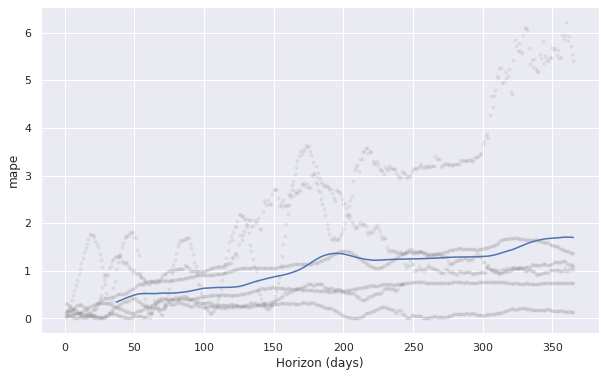

In [55]:
df_cv = cross_validation(prophet_basic, initial='100 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

In [43]:
pro_regressor= Prophet()
pro_regressor.add_regressor('OpenLog')
pro_regressor.add_regressor('HighLog')
pro_regressor.add_regressor('LowLog')
pro_regressor.add_regressor('VolumeLog')
pro_regressor.add_regressor('MarketCapLog')

In [44]:
data.rename(columns={'Date':'ds','CloseLog':'y'},inplace=True)
train_X = data[:1153]
train_y = data[1153:]

In [45]:
#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


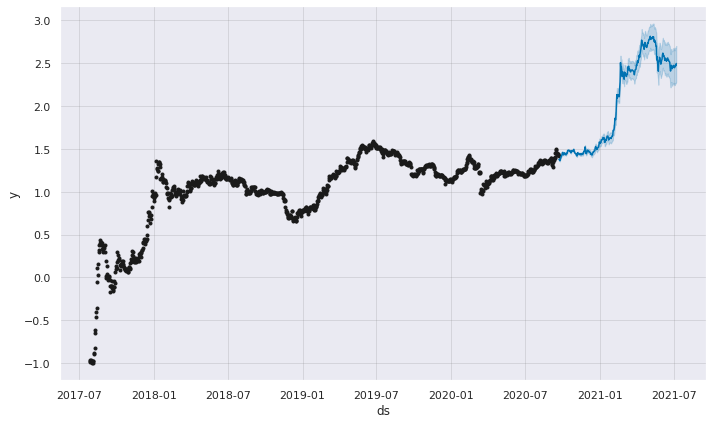

In [46]:
forecast_data = pro_regressor.predict(train_y)
pro_regressor.plot(forecast_data);

INFO:prophet:Making 4 forecasts with cutoffs between 2018-03-30 23:59:59 and 2019-09-21 23:59:59


  0%|          | 0/4 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.001526,0.039068,0.033307,0.029239,0.023232,0.029004,0.089041
1,38 days,0.001546,0.039321,0.033710,0.029559,0.023365,0.029326,0.085616
2,39 days,0.001549,0.039360,0.033892,0.029667,0.023500,0.029444,0.082192
3,40 days,0.001551,0.039387,0.034057,0.029775,0.023766,0.029561,0.082192
4,41 days,0.001557,0.039460,0.034300,0.029946,0.024851,0.029740,0.078767
...,...,...,...,...,...,...,...,...
324,361 days,1.162849,1.078355,0.596920,0.527494,0.065162,0.290904,0.750000
325,362 days,1.162832,1.078347,0.596819,0.524932,0.064810,0.290337,0.750000
326,363 days,1.162803,1.078334,0.596652,0.522753,0.065162,0.289840,0.750000
327,364 days,1.162795,1.078330,0.596550,0.520657,0.065162,0.289396,0.750000


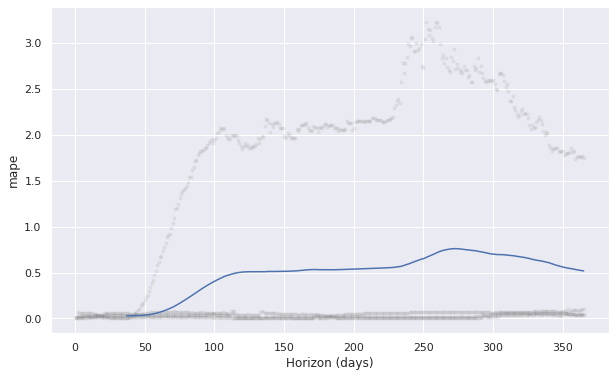

In [47]:
df_cv = cross_validation(pro_regressor, initial='100 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm)
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

In [48]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(pro_regressor))  # Save model

with open('serialized_model.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model

/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')



In [49]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model_basic.json', 'w') as fout:
    fout.write(model_to_json(prophet_basic))  # Save model

with open('serialized_model_basic.json', 'r') as fin:
    m2 = model_from_json(fin.read())  # Load model

/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')



In [50]:
data

,SNo,Name,Symbol,ds,High,Low,Open,Close,Volume,Marketcap,y,OpenLog,HighLog,LowLog,VolumeLog,MarketCapLog
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07,-0.978240,-0.975133,-0.962522,-1.003202,5.301887,7.021760
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07,-0.967635,-0.978364,-0.964654,-0.996160,5.537188,7.032365
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07,-0.982687,-0.968059,-0.962498,-0.993649,5.534747,7.017313
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07,-0.967337,-0.979713,-0.953645,-0.995214,5.531757,7.032663
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07,-0.973001,-0.966838,-0.966022,-0.986480,5.350754,7.026999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,1438,Binance Coin,BNB,2021-07-02 23:59:59,290.621683,277.350302,287.754456,287.423094,1.133633e+09,4.410016e+10,2.458522,2.459022,2.463328,2.443029,9.054472,10.644440
1438,1439,Binance Coin,BNB,2021-07-03 23:59:59,302.605867,283.434010,287.215592,298.237117,1.113777e+09,4.575938e+10,2.474562,2.458208,2.480877,2.452452,9.046798,10.660480
1439,1440,Binance Coin,BNB,2021-07-04 23:59:59,314.713019,292.787370,298.113557,307.732096,1.387396e+09,4.721623e+10,2.488173,2.474382,2.497915,2.466552,9.142200,10.674091
1440,1441,Binance Coin,BNB,2021-07-05 23:59:59,307.684855,293.523465,307.684855,302.377980,1.504870e+09,4.639473e+10,2.480550,2.488106,2.488106,2.467643,9.177499,10.666469


In [51]:
ds = {
    "ds" : pd.to_datetime("2023-05-05 23:59:59")
}
ds = pd.DataFrame(ds, index = [0])

In [52]:
ds

,ds
0,2023-05-05 23:59:59


In [53]:
m2.predict(ds)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-05-05 23:59:59,5.599545,5.631024,5.972858,5.599545,5.599545,0.202897,0.202897,0.202897,0.000774,0.000774,0.000774,0.202123,0.202123,0.202123,0.0,0.0,0.0,5.802442
